In [55]:
import numpy as np
from utils import *
from scipy import ndimage
import os

from skimage.transform import resize

In [59]:
class Image:
    
    def __init__(self, name, imArr):
        self.name = name
        self.imArr = imArr
        self.height, self.width = imArr.shape[:2]

    def fromPath(pathName):
        imArr, imName = readImageNName(pathName)
        if imArr.ndim == 2:
            h, w = imArr.shape
            newIm = np.empty((h, w, 3))
            newIm[:, :, 0] = imArr
            newIm[:, :, 1] = imArr
            newIm[:, :, 2] = imArr
            imArr = newIm
        resizeFactor = 0.25
        imArr = resize(imArr, (imArr.shape[0] * resizeFactor, imArr.shape[1] * resizeFactor))
        result = Image(imName, imArr)
        return result
    

In [60]:
def getAllImsInDir(directory, gridSize = None):
    fileNames = os.listdir(directory)
    
    if gridSize == None:
        gridSize = len(fileNames)
    
    result = []
    
    for fileName in fileNames:
        filePath = "%s/%s" % (directory, fileName)
        result.append(Image.fromPath(filePath))
    return np.array(result)

def ims2Grid(results, gridSize):
    assert len(results) == gridSize ** 2
    grid = []
    
    i = 0
    
    for row in range(gridSize):
        currRow = []
        grid.append(currRow)
        for col in range(gridSize):
            currRow.append(results[i])
            i += 1
    
    return grid

# bulldozerImgs = getAllImsInDir("../lego_bulldozer-rectified")

In [61]:
chessImgs = getAllImsInDir("../chess-rectified")

/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [62]:
chessImgs[0].imArr

array([[[0.28039216, 0.28823529, 0.2627451 ],
        [0.28627451, 0.29901961, 0.27941176],
        [0.29411765, 0.31078431, 0.28921569],
        ...,
        [0.60686275, 0.60882353, 0.61764706],
        [0.59313725, 0.59901961, 0.59705882],
        [0.59705882, 0.59705882, 0.60392157]],

       [[0.28333333, 0.29117647, 0.28235294],
        [0.2872549 , 0.30490196, 0.28235294],
        [0.30980392, 0.31764706, 0.29705882],
        ...,
        [0.60980392, 0.61176471, 0.61568627],
        [0.60490196, 0.60882353, 0.62156863],
        [0.61568627, 0.61666667, 0.6245098 ]],

       [[0.29509804, 0.29901961, 0.29901961],
        [0.30882353, 0.31176471, 0.28137255],
        [0.32156863, 0.3254902 , 0.30490196],
        ...,
        [0.61960784, 0.62745098, 0.62352941],
        [0.61470588, 0.62254902, 0.61666667],
        [0.62058824, 0.62058824, 0.62843137]],

       ...,

       [[0.66470588, 0.66078431, 0.68431373],
        [0.67352941, 0.66176471, 0.69509804],
        [0.67745098, 0

In [63]:
chessImgsGrid = ims2Grid(chessImgs, 17)
chessImgsGrid

[[<__main__.Image at 0xffe9938d0>,

In [80]:
y = 1
x = 2

def easyShift(array, y, x):
    return ndimage.shift(array, ((y, x, 0)), mode="constant", order=0, cval=0)

In [127]:
def depthBySpace(imgsGrid, spacer, gridsize):
    results = []

    for rowI in range(gridSize):
        rowICent = -1 * (rowI - (gridSize // 2))
        row = imgsGrid[rowI]
        for colI in range(gridSize):
            img = row[colI]
            colICent = colI - (gridSize // 2)
            # print(img.name, rowICent, colICent)
            results.append(easyShift(img.imArr, spacer * rowICent, spacer * colICent))
    finalImgImArr = np.zeros(results[0].shape)

    for img in results:
        finalImgImArr += img

    finalImgImArr /= len(results)
    
    return finalImgImArr
        

/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


File saved to: output_imgs/20181028214552_test.png


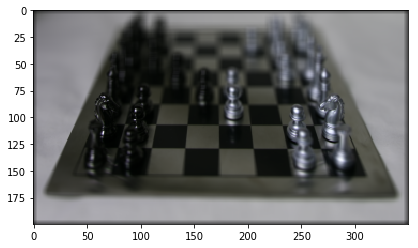

In [129]:
gridSize = 17
spacer = 0.5
printImage("test.png", depthBySpace(chessImgsGrid, spacer, gridSize), disp=True)

In [8]:
printImage("lego_bulldozer-no_shift.png", finalImgImArr)

/Users/reginaongowarsito/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


File saved to: output_imgs/20181024222002_lego_bulldozer-no_shift.png


In [13]:
gridSize = 17
unitOffsets = list(np.arange(-(gridSize // 2), (gridSize // 2) + 1))

In [ ]:
shiftedFinalImgArr = np.zeros(bulldozerImgs[0].imArr.shape)

for i in range(len(bulldozerImgs)):
    img = bulldozerImgs[i]
    shiftedFinalImgArr += img.imArr

shiftedFinalImgArr /= len(bulldozerImgs)
